In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for error calculation
from sklearn.metrics import mean_squared_error

#for acf and pacf 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#import ARIMA
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
shampoo_og=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shampoo_with_exog.csv',index_col=[0],parse_dates=True,squeeze=True)

shampoo_og.drop('Inflation',axis=1,inplace=True)

shampoo_og.head()


,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3


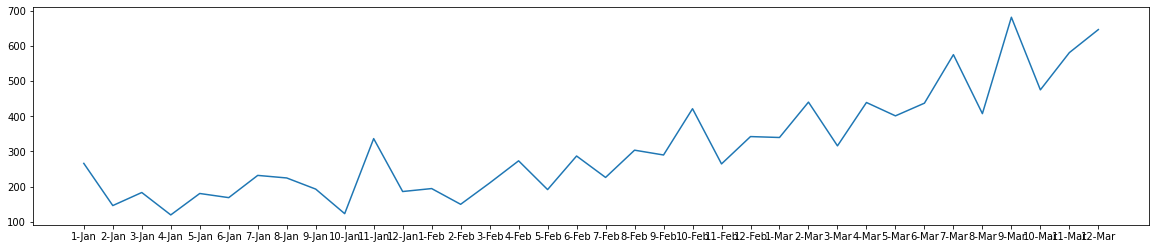

In [6]:
plt.figure(figsize=(20,4))
plt.plot(shampoo_og)

In [ ]:
type(shampoo_og)

pandas.core.frame.DataFrame

In [ ]:
shampoo_og.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [ ]:
shampoo_ma=shampoo_og.rolling(window=10).mean()
shampoo_ma.head()


,Sales
Month,
1-Jan,NaN
2-Jan,NaN
3-Jan,NaN
4-Jan,NaN
5-Jan,NaN


In [ ]:

#making a naive model
shampoo_base=pd.concat([shampoo_og,shampoo_og.shift(1)],axis=1)
shampoo_base.columns=['Actual_Sales','Forecast_Sales']
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [ ]:
#removing not a number values
shampoo_base.dropna(inplace=True)
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [ ]:
#error calculation in Naive or Base model
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecast_Sales)
np.sqrt(shampoo_error)

108.23764726616282

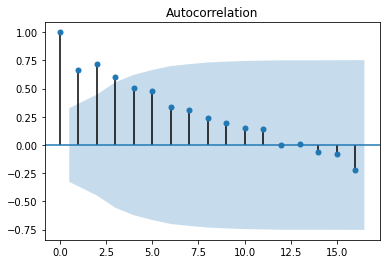

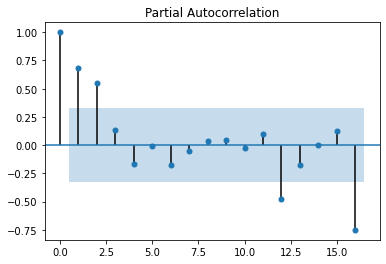

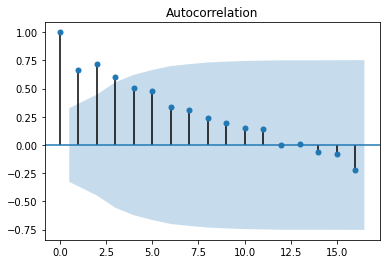

In [ ]:
#pacf plotting for p calculation
#acf plotting for q calculation
plot_pacf(shampoo_og)
plot_acf(shampoo_og)

In [ ]:
#from the above two plots we get to see that value for p = 2 and q = 3
#generally we consider the value of d in the range 0-2 for stationarity

In [12]:
len(shampoo_og)

36

In [13]:
#we will have a training data from 0 to 25 and remaining for testing
train_data = shampoo_og[0:25]
test_data = shampoo_og[25:36]

In [14]:
#now making a model on basis of our interpretation of ACF and PACF plots
shampoo_model=ARIMA(train_data,order=(3,1,2))


In [15]:
shampoo_model_fit = shampoo_model.fit()
#we can get error with 'You should induce invertibility, choose a different model order' as comment so you can change a different P&C for model order 
#later we will see how to check error for all the different orders

In [16]:
shampoo_model_fit.aic
#aic value should be as low as possible

272.38919480711775

In [17]:
shampoo_forecast=shampoo_model_fit.forecast(steps=11)[0]

#proceed with the error calculation
np.sqrt(mean_squared_error(test_data,shampoo_forecast))

130.9271234675795

In [21]:
shampoo_forecast=pd.Series(shampoo_forecast,index=test_data.index)

In [9]:
import warnings 
warnings.filterwarnings("ignore")

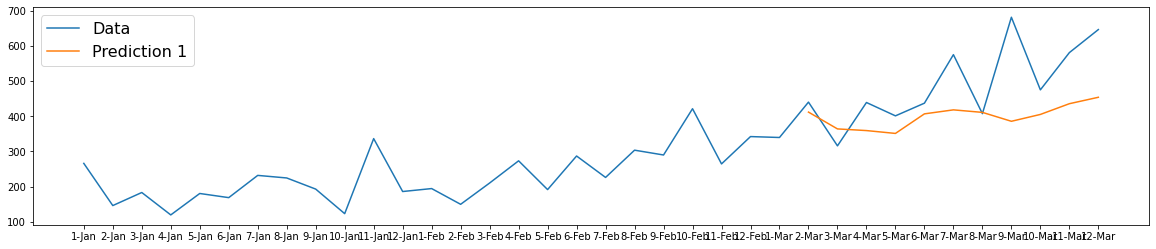

In [32]:
plt.figure(figsize=(20,4))
plt.plot(shampoo_og)
plt.plot(shampoo_forecast)
plt.legend(('Data', 'Prediction 1'),fontsize=16)

In [ ]:
#we can see that we have the error that is greater than naive model so this order would not be accepted or say we dont need analysis 
#now we would check for different models

p_val=range(0,5)
q_val=range(0,5)
d_val=range(0,3)

for p in p_val:
  for q in q_val:
    for d in d_val:
      order = (p,d,q)
      train,test= shampoo_og[0:25],shampoo_og[25:36]
      prediction=list()
      for i in range(len(test)):
        try:
          model = ARIMA(train,order)
          model_fit=model.fit(disp=0)
          predic = model_fit.forecast()[0]
          prediction.append(predic)
          error = mean_squared_error(test,prediction)
          error_sq=np.sqrt(error)
          print('ARIMA%s RMSE = %.2f'%(order,error_sq))
        except:
          continue 

ARIMA(0, 0, 0) RMSE = 279.20
ARIMA(0, 1, 0) RMSE = 183.98
ARIMA(0, 2, 0) RMSE = 184.44
ARIMA(0, 0, 1) RMSE = 264.80
ARIMA(0, 1, 1) RMSE = 201.63
ARIMA(0, 2, 1) RMSE = 168.50
ARIMA(0, 0, 2) RMSE = 242.01
ARIMA(0, 1, 2) RMSE = 185.77
ARIMA(0, 0, 3) RMSE = 249.06
ARIMA(0, 0, 4) RMSE = 175.85
ARIMA(1, 0, 0) RMSE = 247.30
ARIMA(1, 1, 0) RMSE = 178.01
ARIMA(1, 2, 0) RMSE = 137.28
ARIMA(1, 0, 1) RMSE = 215.71
ARIMA(1, 1, 1) RMSE = 205.37
ARIMA(1, 2, 1) RMSE = 161.65
ARIMA(1, 0, 2) RMSE = 209.58
ARIMA(1, 0, 4) RMSE = 158.70
ARIMA(2, 0, 0) RMSE = 212.72
ARIMA(2, 1, 0) RMSE = 188.38
ARIMA(2, 2, 0) RMSE = 184.46
ARIMA(2, 0, 1) RMSE = 184.70
ARIMA(2, 1, 1) RMSE = 199.08
ARIMA(2, 1, 2) RMSE = 189.43
ARIMA(3, 0, 0) RMSE = 215.24
ARIMA(3, 1, 0) RMSE = 148.41
ARIMA(3, 2, 0) RMSE = 157.15
ARIMA(3, 1, 1) RMSE = 151.13
ARIMA(3, 2, 1) RMSE = 127.94
ARIMA(3, 1, 2) RMSE = 134.52
ARIMA(3, 2, 2) RMSE = 125.71
ARIMA(3, 2, 3) RMSE = 120.38
ARIMA(3, 1, 4) RMSE = 193.94
ARIMA(4, 0, 0) RMSE = 182.30
ARIMA(4, 1, 0)

In [19]:
shampoo_model_1=ARIMA(train_data,order=(4,2,1))
shampoo_model_fit_1 = shampoo_model_1.fit()
shampoo_forecast_1=shampoo_model_fit_1.forecast(steps=11)[0]
shampoo_forecast_1=pd.Series(shampoo_forecast_1,index=test_data.index)

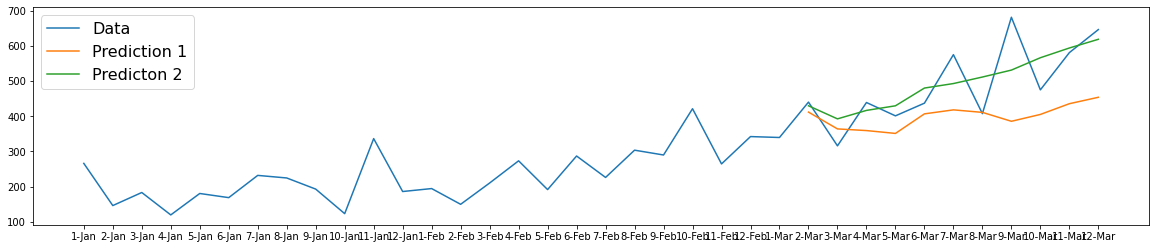

In [22]:
plt.figure(figsize=(20,4))

plt.plot(shampoo_og)
plt.plot(shampoo_forecast)
plt.plot(shampoo_forecast_1)
plt.legend(('Data', 'Prediction 1','Predicton 2'), fontsize=16)

In [ ]:
shampoo_forecast.head()

Month
2-Mar    411.998091
3-Mar    364.118467
4-Mar    359.394760
5-Mar    351.278905
6-Mar    406.971519
dtype: float64

In [26]:
#using rolling forecast origin
for x in test_data.index:
  train_data = shampoo_og[:]

In [ ]:
test_data.index[1]

'3-Mar'

In [24]:
from datetime import timedelta
from datetime import datetime

In [27]:
rolling_predictions = test_data.copy()
my_order = (0,1,0)
for train_end in test_data.index:
    train_data = shampoo_og[:train_end-timedelta(days=1)]
    model = ARIMA(train_data,order=(4,2,1))
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

TypeError: ignored